In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
import apbs
import os
import subprocess

In [3]:
msa_dict = {}
time_dict = {}

In [107]:
msa_dict['20_1'] = 27

In [108]:
time_dict['20_2'] = {'features': 1632.2686340808868, 'process_features_model_1_pred_0': 4.832306385040283, 'predict_and_compile_model_1_pred_0': 110.33620119094849, 'relax_model_1_pred_0': 7.784178972244263, 'process_features_model_2_pred_0': 2.1545448303222656, 'predict_and_compile_model_2_pred_0': 112.49587178230286, 'relax_model_2_pred_0': 2.4754443168640137, 'process_features_model_3_pred_0': 1.739295482635498, 'predict_and_compile_model_3_pred_0': 84.019451379776, 'relax_model_3_pred_0': 2.444845199584961, 'process_features_model_4_pred_0': 1.7186493873596191, 'predict_and_compile_model_4_pred_0': 84.77048254013062, 'relax_model_4_pred_0': 2.185905933380127, 'process_features_model_5_pred_0': 1.751570701599121, 'predict_and_compile_model_5_pred_0': 83.627605676651, 'relax_model_5_pred_0': 2.2332229614257812}

In [71]:
print(msa_dict.keys())

dict_keys([195, '10_2', '10_1', '30_2', '40_1', '40_2', '30_1', '50_1', '50_2', '100_1', '100_2', '500_2', '500_1', '600_2', '600_1', '300_1', '400_2', '300_2', '400_1', '1000_1', '1000_2', '900_2', '900_1', '700_1', '700_2', '800_1', '800_2'])


In [13]:
msa_file = '/Users/maxvandenboom/stayahead/analysis/datasets/references/comp/msa_time.json'
af_file = '/Users/maxvandenboom/stayahead/analysis/datasets/references/comp/af_time.json'

In [39]:
with open(msa_file, 'r') as f:
    msa_dict = json.load(f)
print(msa_dict)

{'195': 31, '10_2': 25, '10_1': 25, '30_2': 27, '40_1': 27, '40_2': 28, '30_1': 28, '50_1': 32, '50_2': 32, '100_1': 32, '100_2': 32, '500_2': 30, '500_1': 34, '600_2': 34, '600_1': 34, '300_1': 24, '400_2': 23, '300_2': 35, '400_1': 41, '1000_1': 23, '1000_2': 30, '900_2': 30, '900_1': 32, '700_1': 24, '700_2': 24, '800_1': 25, '800_2': 28, '20_2': 26, '20_1': 27}


In [25]:
with open(af_file, 'r') as f:
    af_dict = json.load(f)

In [27]:
af_seq_lengths = [195, '10_2', '10_1', '30_2', '40_1', '40_2', '30_1', '50_1', '100_1', '100_2', '500_2', '500_1', '600_2', '600_1', '300_1', '400_2', '300_2', '400_1', '1000_1', '1000_2', '900_2', '900_1', '700_1', '700_2', '800_1', '800_2']
af_time = [32.232479596138, 24.56698921918869, 24.868181403477987, 26.891394658883414, 26.8354253411293, 27.82762371301651, 28.16548629204432, 32.37535165945689, 32.1233011841774, 32.3910920937856, 30.60194276571274, 33.73642239967982, 33.743892935911816, 33.73528685172399, 34.20726254383723, 33.12908483346303, 40.18805304368337, 41.622973561286926, 32.97299625078837, 30.454871769746145, 30.60503669977188, 31.826034080982208, 24.18383309841156, 24.186593159039816, 24.562929713726042, 28.1266077041626]

In [33]:
af_times = {}
for i in range(len(af_time)):
    af_times[str(af_seq_lengths[i])] = af_time[i]

In [34]:
af_times

{'195': 32.232479596138,
 '10_2': 24.56698921918869,
 '10_1': 24.868181403477987,
 '30_2': 26.891394658883414,
 '40_1': 26.8354253411293,
 '40_2': 27.82762371301651,
 '30_1': 28.16548629204432,
 '50_1': 32.37535165945689,
 '100_1': 32.1233011841774,
 '100_2': 32.3910920937856,
 '500_2': 30.60194276571274,
 '500_1': 33.73642239967982,
 '600_2': 33.743892935911816,
 '600_1': 33.73528685172399,
 '300_1': 34.20726254383723,
 '400_2': 33.12908483346303,
 '300_2': 40.18805304368337,
 '400_1': 41.622973561286926,
 '1000_1': 32.97299625078837,
 '1000_2': 30.454871769746145,
 '900_2': 30.60503669977188,
 '900_1': 31.826034080982208,
 '700_1': 24.18383309841156,
 '700_2': 24.186593159039816,
 '800_1': 24.562929713726042,
 '800_2': 28.1266077041626}

In [40]:
from collections import defaultdict
# Create a defaultdict to accumulate sums and counts
accumulator = defaultdict(lambda: [0, 0])

# Iterate through the original dictionary
for key, value in msa_dict.items():
    if '_' in key:
        base_key = key.split('_')[0]
        accumulator[base_key][0] += value  # Sum of values
        accumulator[base_key][1] += 1  # Count of occurrences
    else:
        accumulator[key][0] += value
        accumulator[key][1] += 1

# Create the new dictionary with averaged values
msa_time = {key: total / count for key, (total, count) in accumulator.items()}

# Print the new dictionary
print(msa_time)

{'195': 31.0, '10': 25.0, '30': 27.5, '40': 27.5, '50': 32.0, '100': 32.0, '500': 32.0, '600': 34.0, '300': 29.5, '400': 32.0, '1000': 26.5, '900': 31.0, '700': 24.0, '800': 26.5, '20': 26.5}


In [41]:
af_time

{'195': 32.232479596138,
 '10': 24.717585311333337,
 '30': 27.528440475463867,
 '40': 27.331524527072908,
 '50': 32.37535165945689,
 '100': 32.2571966389815,
 '500': 32.16918258269628,
 '600': 33.73958989381791,
 '300': 37.1976577937603,
 '400': 37.376029197374976,
 '1000': 31.71393401026726,
 '900': 31.215535390377042,
 '700': 24.18521312872569,
 '800': 26.344768708944322}

In [18]:
msa_time = {10: 45, 20: 44, 30: 41, 40: 43, 50: 41, 100: 34, 300: 56, 400: 65, 500: 58, 600: 82, 700: 102, 800: 154, 900: 183, 1000: 130, 1273: 194}

In [45]:
total_af_time = {}
for key, value in af_time.items():
    total_af_time[int(key)] = value + msa_time[key]

In [48]:
total_af_time[1273] = 64.232479596138

In [1]:
esm_time = {10: 45, 20: 44, 30: 41, 40: 43, 50: 41, 100: 34, 300: 56, 400: 65, 500: 58, 600: 82, 700: 102, 800: 154, 900: 183, 1000: 130, 1273: 194}

In [19]:
esm_times = {key: value / 3 for key, value in esm_time.items()}

In [21]:
esm_times[195] = 13

In [49]:
seq_lengths = total_af_time.keys()
comp_time = total_af_time.values()

In [50]:
print(seq_length)
print(comp_time)

dict_keys([10, 20, 30, 40, 50, 100, 300, 400, 500, 600, 700, 800, 900, 1000, 1273])
dict_values([63.232479596138, 49.71758531133334, 55.02844047546387, 54.83152452707291, 64.3753516594569, 64.2571966389815, 64.16918258269628, 67.73958989381791, 66.6976577937603, 69.37602919737498, 58.21393401026726, 62.21553539037704, 48.18521312872569, 52.84476870894432, 64.232479596138])


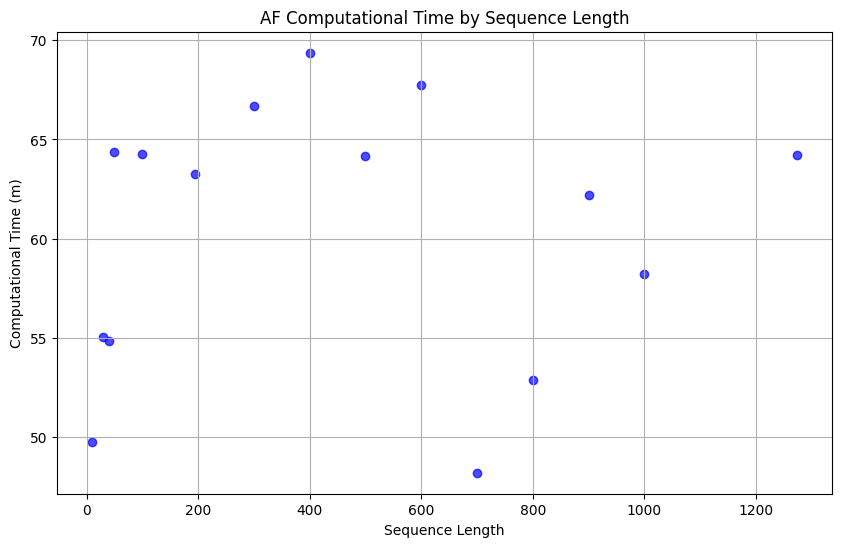

In [52]:
# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths, comp_time, color='blue', label='Sequences', alpha=0.7)

plt.title('AF Computational Time by Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time (m)')
plt.grid(True)

# Show plot
plt.show()

sacct -j 6972646 --format=JobID,JobName,Partition,AllocCPUS,State,ExitCode,Elapsed,MaxRSS,MaxVMSize,MaxDiskWrite,MaxDiskRead

6972630
6972631
6972632
6972633
6972634
6972635
6972637
6972638
6972639
6972640
6972641
6972643
6972645
6972646


In [109]:
with open(af_file, 'w') as file:
        json.dump(time_dict, file, indent=4)

In [110]:
with open(msa_file, 'w') as file:
        json.dump(msa_dict, file, indent=4)

In [75]:
msa_keys = list(msa_dict.keys())
time_keys = list(time_dict.keys())

In [ ]:
# Process data to separate sequence length and number
seq_lengths_1, comp_times_1 = [], []
seq_lengths_2, comp_times_2 = [], []


for key, value in msa_dict.items():
    parts = key.split('_')
    seq_length = int(parts[0]) if parts[0].isdigit() else key
    seq_number = parts[1] if len(parts) > 1 else None
    
    if seq_number == '1':
        seq_lengths_1.append(seq_length)
        comp_times_1.append(value)
    elif seq_number == '2':
        seq_lengths_2.append(seq_length)
        comp_times_2.append(value)
    else:  # For cases without a sequence number, we can decide how to handle these if needed
        pass

# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths_1, comp_times_1, color='blue', label='Sequence 1', alpha=0.7)
plt.scatter(seq_lengths_2, comp_times_2, color='red', label='Sequence 2', alpha=0.7)

plt.title('Computational Time by Sequence Length and Number')
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [81]:
print(time_keys)

[195, '10_2', '10_1', '30_2', '40_1', '40_2', '30_1', '50_1', '100_1', '100_2', '500_2', '500_1', '600_2', '600_1', '300_1', '400_2', '300_2', '400_1', '1000_1', '1000_2', '900_2', '900_1', '700_1', '700_2', '800_1', '800_2']


In [88]:
seq_lengths, comp_features = [], []

for key in time_keys:
    tmp_dict = time_dict[key]
    tmp_keys = list(tmp_dict.keys())
    if key == 195 or key == 1273:
        seq_length = int(key)
    else:
        parts = key.split('_')
        seq_length = int(parts[0]) if parts[0].isdigit() else key
    for i in range(len(tmp_keys)):
        if i == 0:
            seq_lengths.append(seq_length)
            tmp_features = (tmp_dict[tmp_keys[i]]/60)
            comp_features.append(tmp_features)         
        

In [90]:
print(comp_features)

[32.232479596138, 24.56698921918869, 24.868181403477987, 26.891394658883414, 26.8354253411293, 27.82762371301651, 28.16548629204432, 32.37535165945689, 32.1233011841774, 32.3910920937856, 30.60194276571274, 33.73642239967982, 33.743892935911816, 33.73528685172399, 34.20726254383723, 33.12908483346303, 40.18805304368337, 41.622973561286926, 32.97299625078837, 30.454871769746145, 30.60503669977188, 31.826034080982208, 24.18383309841156, 24.186593159039816, 24.562929713726042, 28.1266077041626]


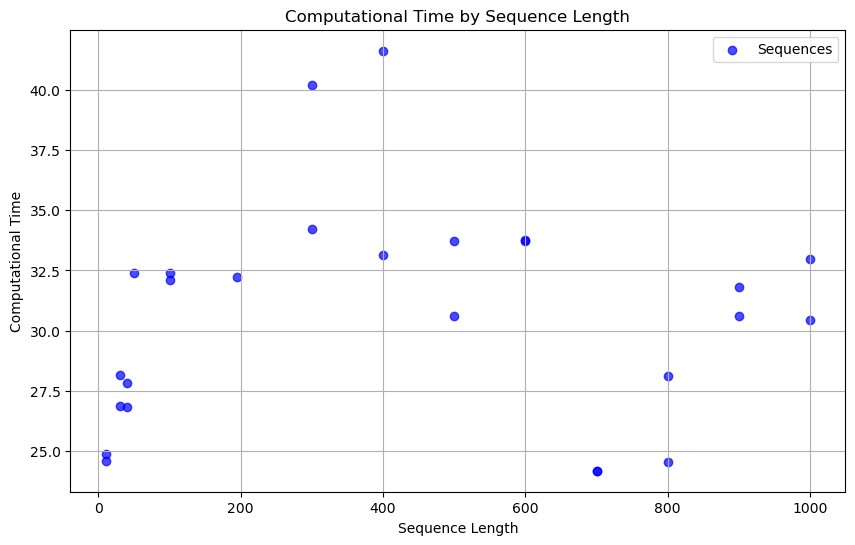

In [111]:
# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths, comp_features, color='blue', label='Sequences', alpha=0.7)

plt.title('Computational Time by Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [112]:
seq_lengths_time, total_time = [], []

for key in time_keys:
    tmp_dict = time_dict[key]
    tmp_keys = list(tmp_dict.keys())
    if key == 195 or key == 1273:
        seq_length = int(key)
    else:
        parts = key.split('_')
        seq_length = int(parts[0]) if parts[0].isdigit() else key
    seq_lengths_time.append(seq_length)
    tmp_time = 0
    for i in range(len(tmp_keys)):
        if i > 0:
            tmp_time += tmp_dict[tmp_keys[i]]
    total_time.append(tmp_time/60)

In [99]:
print(seq_lengths_time)

[195, 10, 10, 30, 40, 40, 30, 50, 100, 100, 500, 500, 600, 600, 300, 400, 300, 400, 1000, 1000, 900, 900, 700, 700, 800, 800]


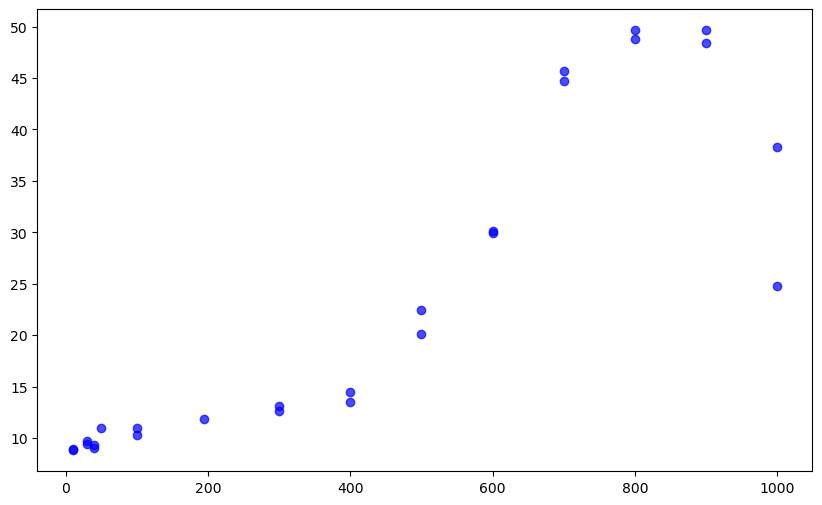

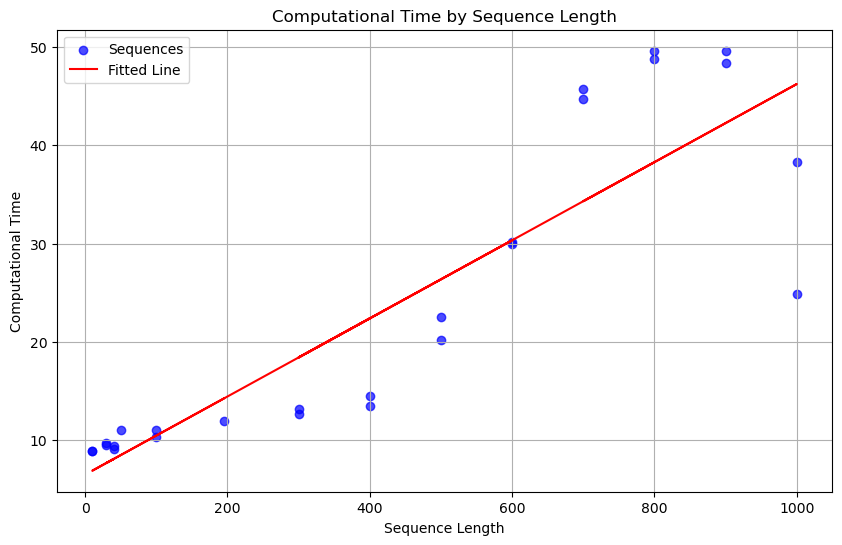

In [113]:
# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths_time, total_time, color='blue', label='Sequences', alpha=0.7)
# Calculate coefficients of the linear fit (polynomial of degree 1)
slope, intercept = np.polyfit(seq_lengths_time, total_time, 1)

# Generate y values for the fitted line, using the slope and intercept
fitted_line = np.polyval([slope, intercept], seq_lengths_time)


# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths_time, total_time, color='blue', label='Sequences', alpha=0.7)

# Add the fitted line
plt.plot(seq_lengths_time, fitted_line, color='red', label='Fitted Line')

plt.title('Computational Time by Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [2]:
def extract_chain(input_file, output_file, chain_id):
    # Create a PDB parser
    parser = PDB.PDBParser()

    # Parse the structure from file
    structure = parser.get_structure("PDB_structure", input_file)

    # Create a PDB IO object for writing structures
    io = PDB.PDBIO()

    # Iterate over all models in the structure
    for model in structure:
        # We will save only the selected chain
        for chain in model:
            if chain.id == chain_id:
                # Set the structure for the output
                io.set_structure(chain)
                # Save the chain to a new file
                io.save(output_file)
                return

    print("Chain not found.")

In [3]:
input_file = '/home/max/stayahead/snellius2/outputs/6m0j.pdb'
output_file = '/home/max/stayahead/snellius2/outputs/ACE2.pdb'
chain_id = 'E'
extract_chain(input_file, output_file, chain_id)

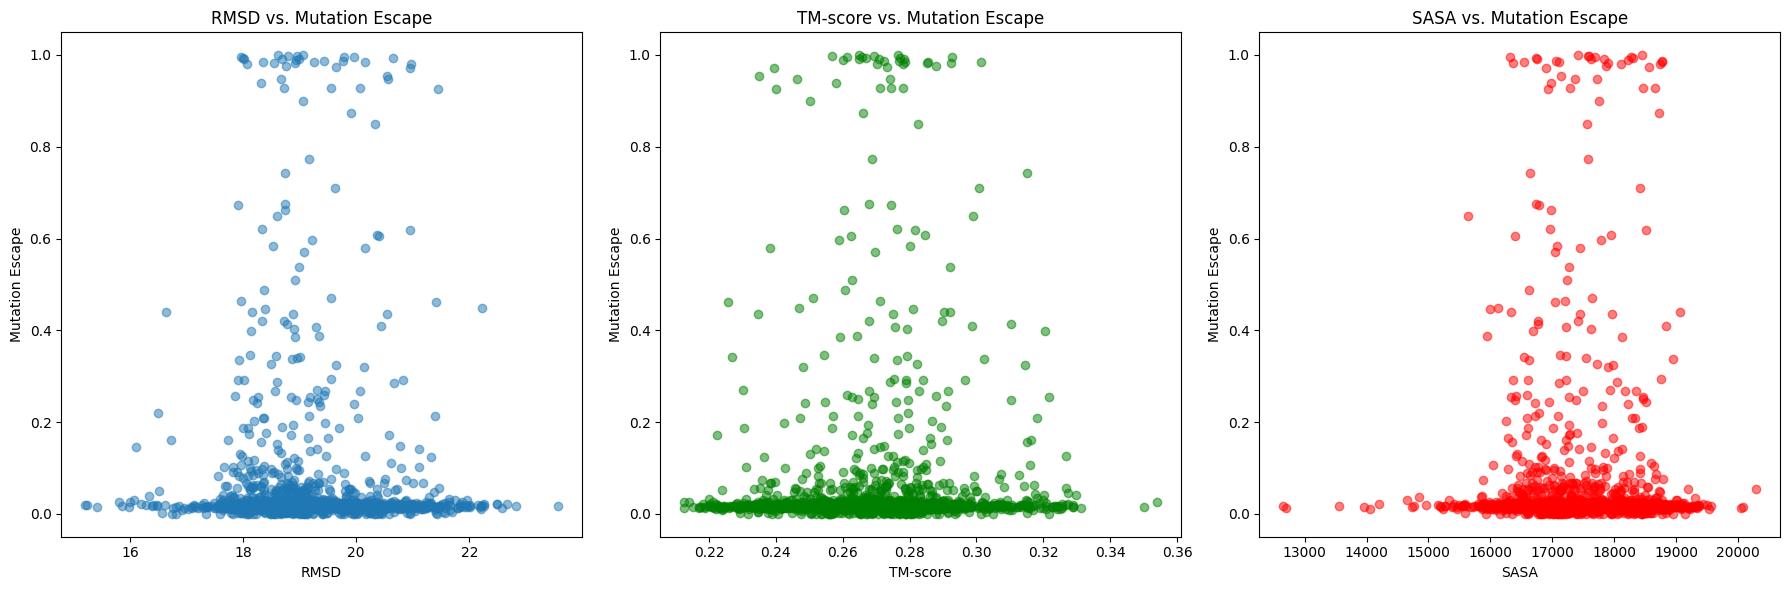

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/home/max/stayahead/snellius2/outputs/analysis/esmfold/1step/ESM_1step_Ab_link.csv')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with three subplots

# Scatter plot for RMSD vs. Mutation Escape
axes[0].scatter(data['rmsd'], data['mut_escape'], alpha=0.5)
axes[0].set_xlabel('RMSD')
axes[0].set_ylabel('Mutation Escape')
axes[0].set_title('RMSD vs. Mutation Escape')

# Scatter plot for TM-score vs. Mutation Escape
axes[1].scatter(data['tm_score'], data['mut_escape'], alpha=0.5, color='green')
axes[1].set_xlabel('TM-score')
axes[1].set_ylabel('Mutation Escape')
axes[1].set_title('TM-score vs. Mutation Escape')

# Scatter plot for SASA vs. Mutation Escape
axes[2].scatter(data['sasa'], data['mut_escape'], alpha=0.5, color='red')
axes[2].set_xlabel('SASA')
axes[2].set_ylabel('Mutation Escape')
axes[2].set_title('SASA vs. Mutation Escape')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

In [3]:
def run_pdb2pqr(pdb_path, pqr_path, forcefield='parse'):
    """
    Convert a PDB file to a PQR file using PDB2PQR.
    :param pdb_path: Path to the input PDB file.
    :param pqr_path: Path to the output PQR file.
    :param forcefield: Forcefield to use, default is 'parse'.
    """
    pdb2pqr_cmd = [
        'pdb2pqr',
        '--ff={}'.format(forcefield),
        '--output={}'.format(pqr_path),
        pdb_path
    ]
    subprocess.run(pdb2pqr_cmd, check=True)

In [12]:
def run_apbs(apbs_input_path):
    apbs_input_path = os.path.abspath(apbs_input_path)

    print("Running APBS with:")
    print("Input file path:", apbs_input_path)

    apbs_cmd = [
        '/usr/bin/apbs',
        apbs_input_path
    ]

    # Running the command and capturing output and errors
    process = subprocess.run(apbs_cmd)

In [13]:
pdb_path = '/home/max/stayahead/snellius2/outputs/apbs/test/ACE2.pdb'
pqr_path = '/home/max/stayahead/snellius2/outputs/apbs/test/ACE2.pqr'
apbs_input_path = '/home/max/stayahead/snellius2/outputs/apbs/test/ACE2.in'

run_apbs(apbs_input_path)
# pdb2pqr --ff=AMBER --apbs-input=ACE2.in ACE2.pdb ACE2.pqr
# --noopt --nodebump
# python main.py /home/max/stayahead/snellius2/outputs/apbs/test/ACE2.in

Running APBS with:
Input file path: /home/max/stayahead/snellius2/outputs/apbs/test/ACE2.in


----------------------------------------------------------------------
    APBS -- Adaptive Poisson-Boltzmann Solver
    Version 1.4.1
    
    Nathan A. Baker (nathan.baker@pnnl.gov)
    Pacific Northwest National Laboratory
    
    Additional contributing authors listed in the code documentation.
    
    Copyright (c) 2010-2012 Battelle Memorial Institute. Developed at the Pacific
    Northwest National Laboratory, operated by Battelle Memorial Institute, Pacific
    Northwest Division for the U.S. Department of Energy.
    
    Portions Copyright (c) 2002-2010, Washington University in St. Louis.
    Portions Copyright (c) 2002-2010, Nathan A. Baker.
    Portions Copyright (c) 1999-2002, The Regents of the University of California.
    Portions Copyright (c) 1995, Michael Holst.
    All rights reserved.
    
    Redistribution and use in source and binary forms, with or without
    modifi

Vio_ctor2: some error occurred.
Vio_ctor: Vio_ctor2() failed.
Problem opening virtual socket ACE2.pqr!
Error reading molecules!
